Group 5
- Aljevan Komala (00000044016)
- Jerrell Susilo (00000045370)
- Thomas Januardy (00000046001)

In [ ]:
# import library

import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data

london = pd.read_csv("london_merged.csv", sep=",")
london.info()
london

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [3]:
# data preprocessing

# convert dtypes
london = london.astype({'weather_code':'int64'})
london = london.astype({'is_holiday':'int64'})
london = london.astype({'is_weekend':'int64'})
london = london.astype({'season':'int64'})

london['timestamp'] = pd.to_datetime(london['timestamp'])

print(london.dtypes)
print(london.describe)

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code             int64
is_holiday               int64
is_weekend               int64
season                   int64
dtype: object
<bound method NDFrame.describe of                 timestamp   cnt   t1   t2    hum  wind_speed  weather_code  \
0     2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0             3   
1     2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0             1   
2     2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0             1   
3     2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0             1   
4     2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5             1   
...                   ...   ...  ...  ...    ...         ...           ...   
17409 2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0             3   
17410 2017-01-03 2

In [5]:
# duplicate dataframe
london_time = london.copy()

# specific timestamp dtype into columns
london_time['year'] = london_time['timestamp'].dt.year
london_time['month'] = london_time['timestamp'].dt.month
london_time['day'] = london_time['timestamp'].dt.day
london_time['day_of_week'] = london_time['timestamp'].dt.dayofweek
london_time['day_of_week'] += 1 #changing the index to map monday as 1 instead of 0
london_time['hour'] = london_time['timestamp'].dt.hour

london_df = ['year', 'month', 'season', 'day', 'day_of_week', 'is_weekend', 'is_holiday',
             'hour', 'cnt', 't1', 't2', 'weather_code', 'hum', 'wind_speed']
london_time = london_time[london_df]

london_time


,year,month,season,day,day_of_week,is_weekend,is_holiday,hour,cnt,t1,t2,weather_code,hum,wind_speed
0,2015,1,3,4,7,1,0,0,182,3.0,2.0,3,93.0,6.0
1,2015,1,3,4,7,1,0,1,138,3.0,2.5,1,93.0,5.0
2,2015,1,3,4,7,1,0,2,134,2.5,2.5,1,96.5,0.0
3,2015,1,3,4,7,1,0,3,72,2.0,2.0,1,100.0,0.0
4,2015,1,3,4,7,1,0,4,47,2.0,0.0,1,93.0,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017,1,3,3,2,0,0,19,1042,5.0,1.0,3,81.0,19.0
17410,2017,1,3,3,2,0,0,20,541,5.0,1.0,4,81.0,21.0
17411,2017,1,3,3,2,0,0,21,337,5.5,1.5,4,78.5,24.0
17412,2017,1,3,3,2,0,0,22,224,5.5,1.5,4,76.0,23.0


In [6]:
# data checking (missing values/null)

print(london.isnull().sum())
print(london.isna().sum())

print(london_time.isnull().sum())
print(london_time.isna().sum())

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64
timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64
year            0
month           0
season          0
day             0
day_of_week     0
is_weekend      0
is_holiday      0
hour            0
cnt             0
t1              0
t2              0
weather_code    0
hum             0
wind_speed      0
dtype: int64
year            0
month           0
season          0
day             0
day_of_week     0
is_weekend      0
is_holiday      0
hour            0
cnt             0
t1              0
t2              0
weather_code    0
hum             0
wind_speed      0
dtype: int64


In [7]:
# data group by target variables (is_holiday)
london.groupby('is_holiday').describe().T

is_holiday               0           1
cnt    count  17030.000000  384.000000
       mean    1151.525191  769.526042
       std     1089.182222  802.242181
       min        0.000000   14.000000
       25%      261.000000  171.500000
...                    ...         ...
season min        0.000000    0.000000
       25%        1.000000    0.000000
       50%        1.000000    0.500000
       75%        2.000000    3.000000
       max        3.000000    3.000000

[64 rows x 2 columns]

In [8]:
# data group by target variables (is_weekend)
london.groupby('is_weekend').describe().T

is_weekend               0            1
cnt    count  12444.000000  4970.000000
       mean    1209.274831   977.415694
       std     1136.037077   925.205089
       min        9.000000     0.000000
       25%      258.000000   256.000000
...                    ...          ...
season min        0.000000     0.000000
       25%        0.000000     0.000000
       50%        1.000000     1.000000
       75%        2.000000     2.000000
       max        3.000000     3.000000

[64 rows x 2 columns]

<AxesSubplot:>

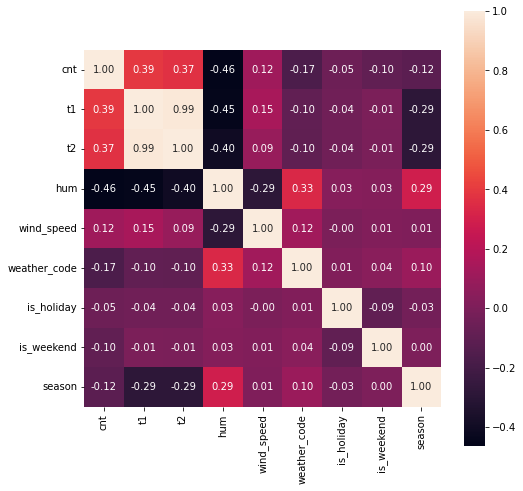

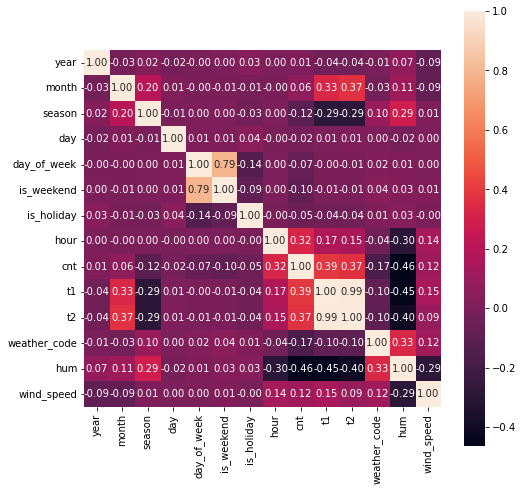

In [9]:
# heatmap figure
plt.figure(figsize=(8,8))
sns.heatmap(london.corr(), square=True, annot=True, fmt='1.2f')

# heatmap figure (time)
plt.figure(figsize=(8,8))
sns.heatmap(london_time.corr(), square=True, annot=True, fmt='1.2f')

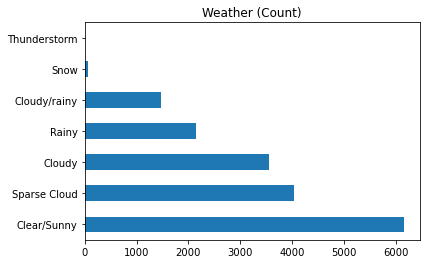

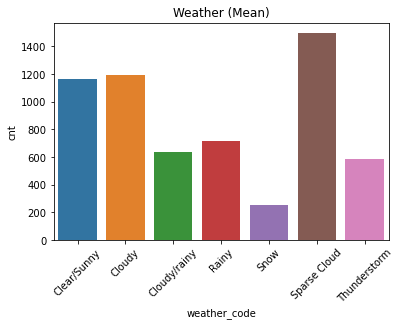

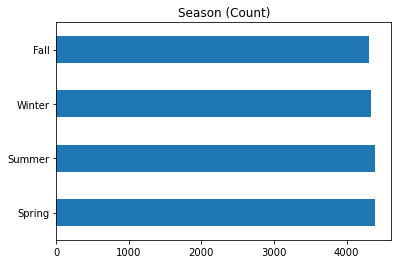

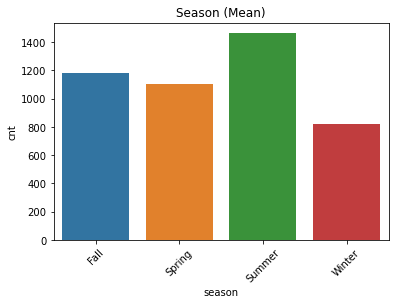

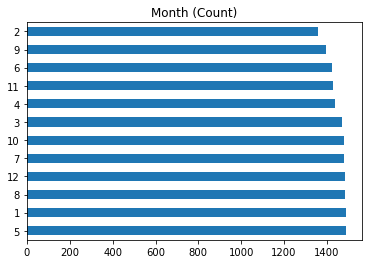

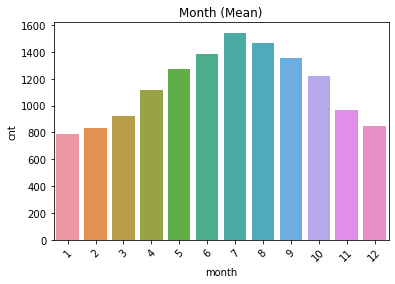

In [10]:
# data visualization

london_viz = london_time.copy()

# weather
weather_map = {1: 'Clear/Sunny', 2:'Sparse Cloud', 3:'Cloudy', 4:'Cloudy/rainy', 7:'Rainy', 10:'Thunderstorm', 26:"Snow"}
london_viz['weather_code'] = london_viz['weather_code'].map(weather_map)

london_weather = london_viz['weather_code'].value_counts()
london_weather.plot(kind='barh')
plt.title('Weather (Count)')
plt.show()

london_weather_mean = london_viz.groupby(['weather_code'])['cnt'].mean().reset_index()
sns.barplot(data=london_weather_mean, x='weather_code', y='cnt')
plt.xticks(rotation=45)
plt.title('Weather (Mean)')
plt.show()

# season
season_map = {0: 'Spring', 1:'Summer', 2:'Fall', 3:'Winter'}
london_viz['season'] = london_viz['season'].map(season_map)

london_season = london_viz['season'].value_counts()
london_season.plot(kind='barh')
plt.title('Season (Count)')
plt.show()

london_season_mean = london_viz.groupby(['season'])['cnt'].mean().reset_index()
sns.barplot(data=london_season_mean, x='season', y='cnt')
plt.xticks(rotation=45)
plt.title('Season (Mean)')
plt.show()

# month
london_month = london_viz['month'].value_counts()
london_month.plot(kind='barh')
plt.title('Month (Count)')
plt.show()

london_month_mean = london_viz.groupby(['month'])['cnt'].mean().reset_index()
sns.barplot(data=london_month_mean, x='month', y='cnt')
plt.xticks(rotation=45)
plt.title('Month (Mean)')
plt.show()


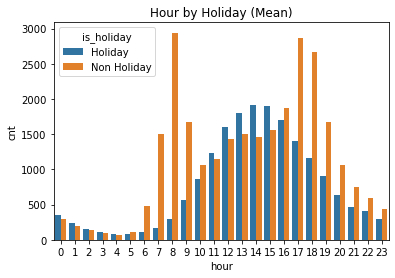

In [11]:
# data visualization

# hour by holiday (mean)
holiday_map = {0: 'Non Holiday', 1:'Holiday'}
london_viz['is_holiday'] = london_viz['is_holiday'].map(holiday_map)

london_holiday = london_viz.groupby(['hour', 'is_holiday'])['cnt'].mean().reset_index()
sns.barplot(data=london_holiday, x='hour', y='cnt', hue='is_holiday')
plt.title("Hour by Holiday (Mean)")
plt.show()

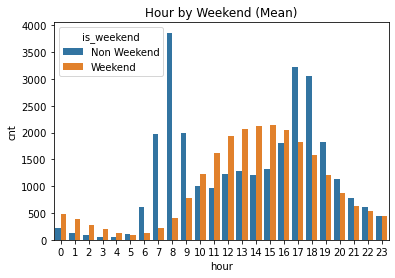

In [12]:
# hour by weekend (mean)
weekend_map = {0: 'Non Weekend', 1:'Weekend'}
london_viz['is_weekend'] = london_viz['is_weekend'].map(weekend_map)

london_weekend = london_viz.groupby(['hour', 'is_weekend'])['cnt'].mean().reset_index()
sns.barplot(data=london_weekend, x='hour', y='cnt', hue='is_weekend')
plt.title("Hour by Weekend (Mean)")
plt.show()

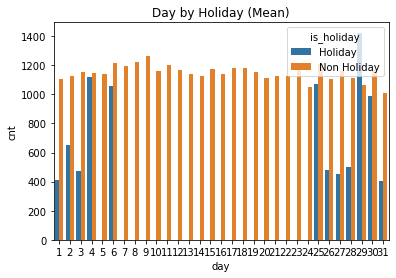

In [13]:
# day by holiday (mean)

london_holiday2 = london_viz.groupby(['day', 'is_holiday'])['cnt'].mean().reset_index()
sns.barplot(data=london_holiday2, x='day', y='cnt', hue='is_holiday')
plt.title("Day by Holiday (Mean)")
plt.show()

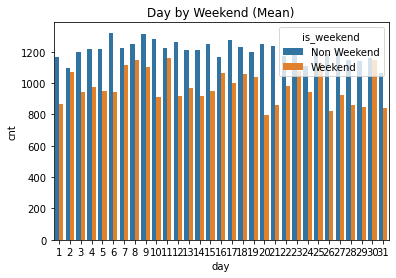

In [14]:
# day by weekend (mean)

london_weekend2 = london_viz.groupby(['day', 'is_weekend'])['cnt'].mean().reset_index()
sns.barplot(data=london_weekend2, x='day', y='cnt', hue='is_weekend')
plt.title("Day by Weekend (Mean)")
plt.show()

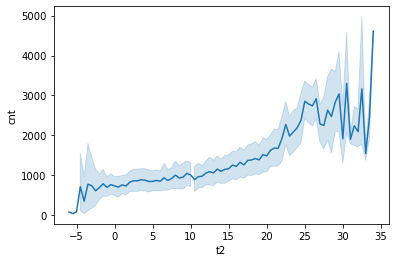

In [15]:
# temperature
london_temp = london_viz.groupby(['hour', 't2'])['cnt'].mean().reset_index()
sns.lineplot(data=london_temp, x='t2', y='cnt')
plt.show()

In [27]:
# naive bayes model 

# is_holiday
# split: training and testing
from sklearn.model_selection import train_test_split

#membagi data ke X dan Y

london_model = london_time.copy()
Y = london_model['is_holiday']
X = london_model.drop(columns='is_holiday')

#membagi data training 70% dan testing 30%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [28]:
# naive bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.84
Accuracy of GNB classifier on test set: 0.83


Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      5120
           1       0.07      0.60      0.13       105

    accuracy                           0.83      5225
   macro avg       0.53      0.72      0.52      5225
weighted avg       0.97      0.83      0.89      5225



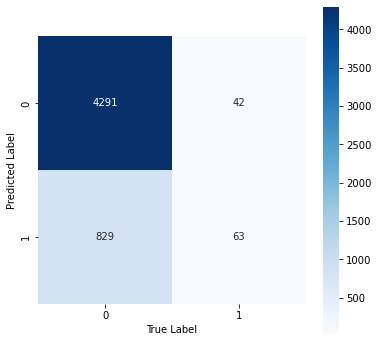

In [29]:
# confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = gnb.predict(X_test)


mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(mat.T, square= True, annot= True, cmap='Blues', fmt="d")
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# precision, recall f1-score and accuracy
print("Naive Bayes Classifier\n")
print(classification_report(y_test, y_pred))

In [30]:
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(gnb, X_train, y_train, cv=10)

In [31]:
#Cross Validation naive bayes

print('Cross-Validation Accuracy Scores for Naive Bayes', scores1)
scores1 = pd.Series(scores1)
scores1.min(), scores1.mean(), scores1.max()

Cross-Validation Accuracy Scores for Naive Bayes [0.8269073  0.83100902 0.86710418 0.8490566  0.80885972 0.85808039
 0.83839212 0.83839212 0.82608696 0.83743842]


(0.8088597210828548, 0.838132685678724, 0.867104183757178)

In [37]:
#is_weekend

# split: training and testing
#membagi data ke X dan Y

london_model2 = london_time.copy()
Y2 = london_model2['is_weekend']
X2 = london_model2.drop(columns='is_weekend')

#membagi data training 70% dan testing 30%
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=0)

In [38]:
# naive bayes

gnb2 = GaussianNB()
gnb2.fit(X2_train, y2_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb2.score(X2_train, y2_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb2.score(X2_test, y2_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 1.00


Naive Bayes Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3758
           1       1.00      1.00      1.00      1467

    accuracy                           1.00      5225
   macro avg       1.00      1.00      1.00      5225
weighted avg       1.00      1.00      1.00      5225



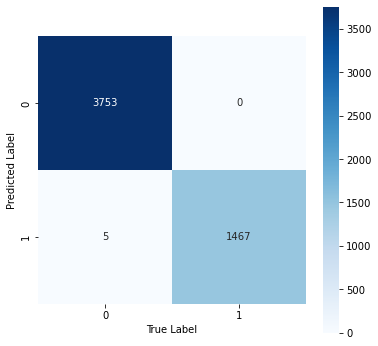

In [39]:
# confusion matrix
y2_pred = gnb2.predict(X2_test)


mat2 = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(6,6))
sns.heatmap(mat2.T, square= True, annot= True, cmap='Blues', fmt="d")
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# precision, recall f1-score and accuracy
print("Naive Bayes Classifier\n")
print(classification_report(y2_test, y2_pred))

In [41]:
scores2 = cross_val_score(gnb2, X2_train, y2_train, cv=10)

In [42]:
# Cross Validation naive bayes

print('Cross-Validation Accuracy Scores for Naive Bayes', scores2)
scores2 = pd.Series(scores2)
scores2.min(), scores2.mean(), scores2.max()

Cross-Validation Accuracy Scores for Naive Bayes [1.         0.99835931 0.99917966 1.         0.99917966 1.
 0.99917966 0.99917966 0.99917966 1.        ]


(0.9983593109105825, 0.999425758818704, 1.0)

In [58]:
# random forest model

#is_holiday
#membagi X dan y
feature_cols = ['cnt','t1', 't2','hum','wind_speed','year','month','season','day','day_of_week','hour','weather_code']
X1 = london_time[feature_cols] #features
y1 = london_time['is_holiday'] #target variable

In [59]:
#split dataset into training and test set

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0) # 70 % training and 30 % test

In [60]:
from sklearn.ensemble import RandomForestClassifier

#create decision tree classifier object
rf = RandomForestClassifier()

#train decision tree classifier
rf = rf.fit(X1_train,y1_train)

#predict the response for test dataset
y1_pred_rf = rf.predict(X1_test)


Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5120
           1       0.99      0.92      0.96       105

    accuracy                           1.00      5225
   macro avg       0.99      0.96      0.98      5225
weighted avg       1.00      1.00      1.00      5225



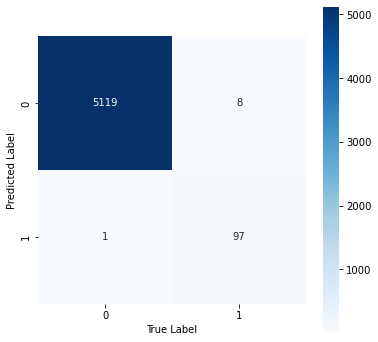

In [61]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y1_pred = rf.predict(X1_test)


mat1 = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(6,6))
sns.heatmap(mat1.T, square= True, annot= True, cmap='Blues', fmt="d")
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# precision, recall f1-score and accuracy
print("Random Forest Classifier\n")
print(classification_report(y1_test, y1_pred))

In [62]:
#Model accuracy
from sklearn import metrics

print("Accuracy Random Forest:",metrics.accuracy_score(y1_test,y1_pred_rf))

Accuracy Random Forest: 0.9982775119617225


In [63]:
#Cross Validation Random Forest

from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(rf, X1_train, y1_train, cv=10)

#Cross Validation

print('Cross-Validation Accuracy Scores for Random Forest', scores2)
scores2 = pd.Series(scores2)
scores2.min(), scores2.mean(), scores2.max()

Cross-Validation Accuracy Scores for Random Forest [0.99835931 0.99753897 1.         0.99753897 0.99753897 0.99835931
 0.99835931 0.99835931 1.         0.99835796]


(0.9975389663658737, 0.9984412106615157, 1.0)

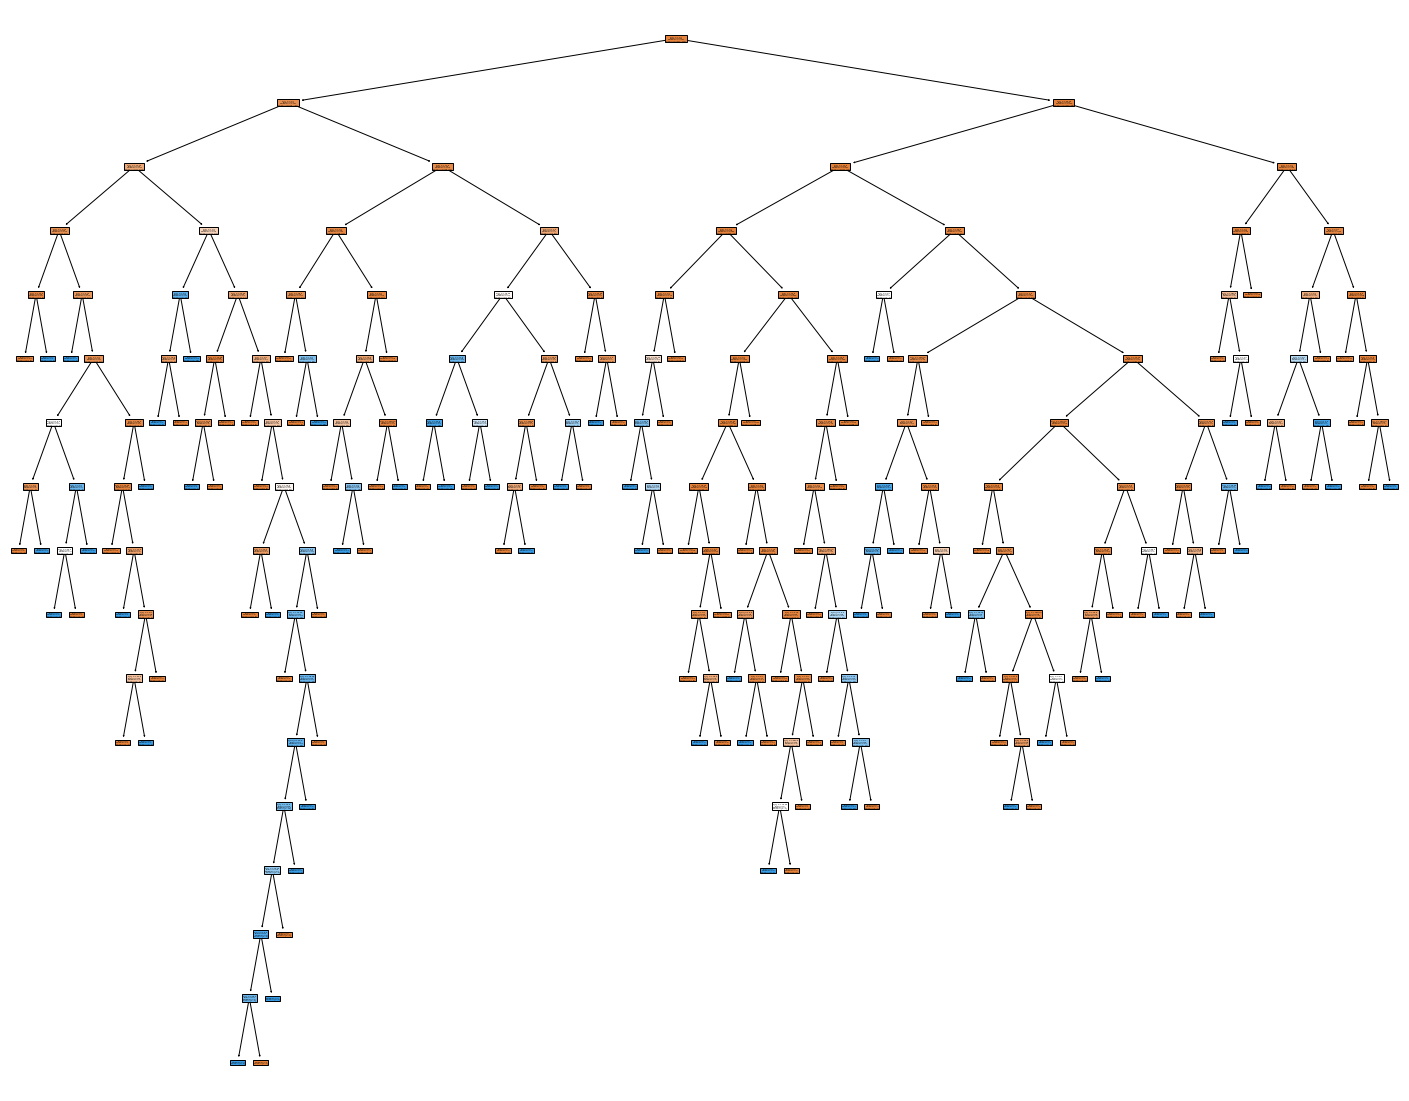

In [64]:
#Without Pruning

from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(rf.estimators_[0],filled=True);

In [65]:
#With Pruning

from sklearn.ensemble import RandomForestClassifier

#create decision tree classifier obj
rf_p = RandomForestClassifier(criterion="entropy", max_depth=3, max_leaf_nodes=5, class_weight=None)

#train decision tree classifier
rf_p = rf_p.fit(X1_train,y1_train)

#predict the response for test dataset
y1_pred_rfp = rf_p.predict(X1_test)

print("Accuracy Random Forest (Pruning)",metrics.accuracy_score(y1_test,y1_pred_rfp))


Accuracy Random Forest (Pruning) 0.9799043062200957


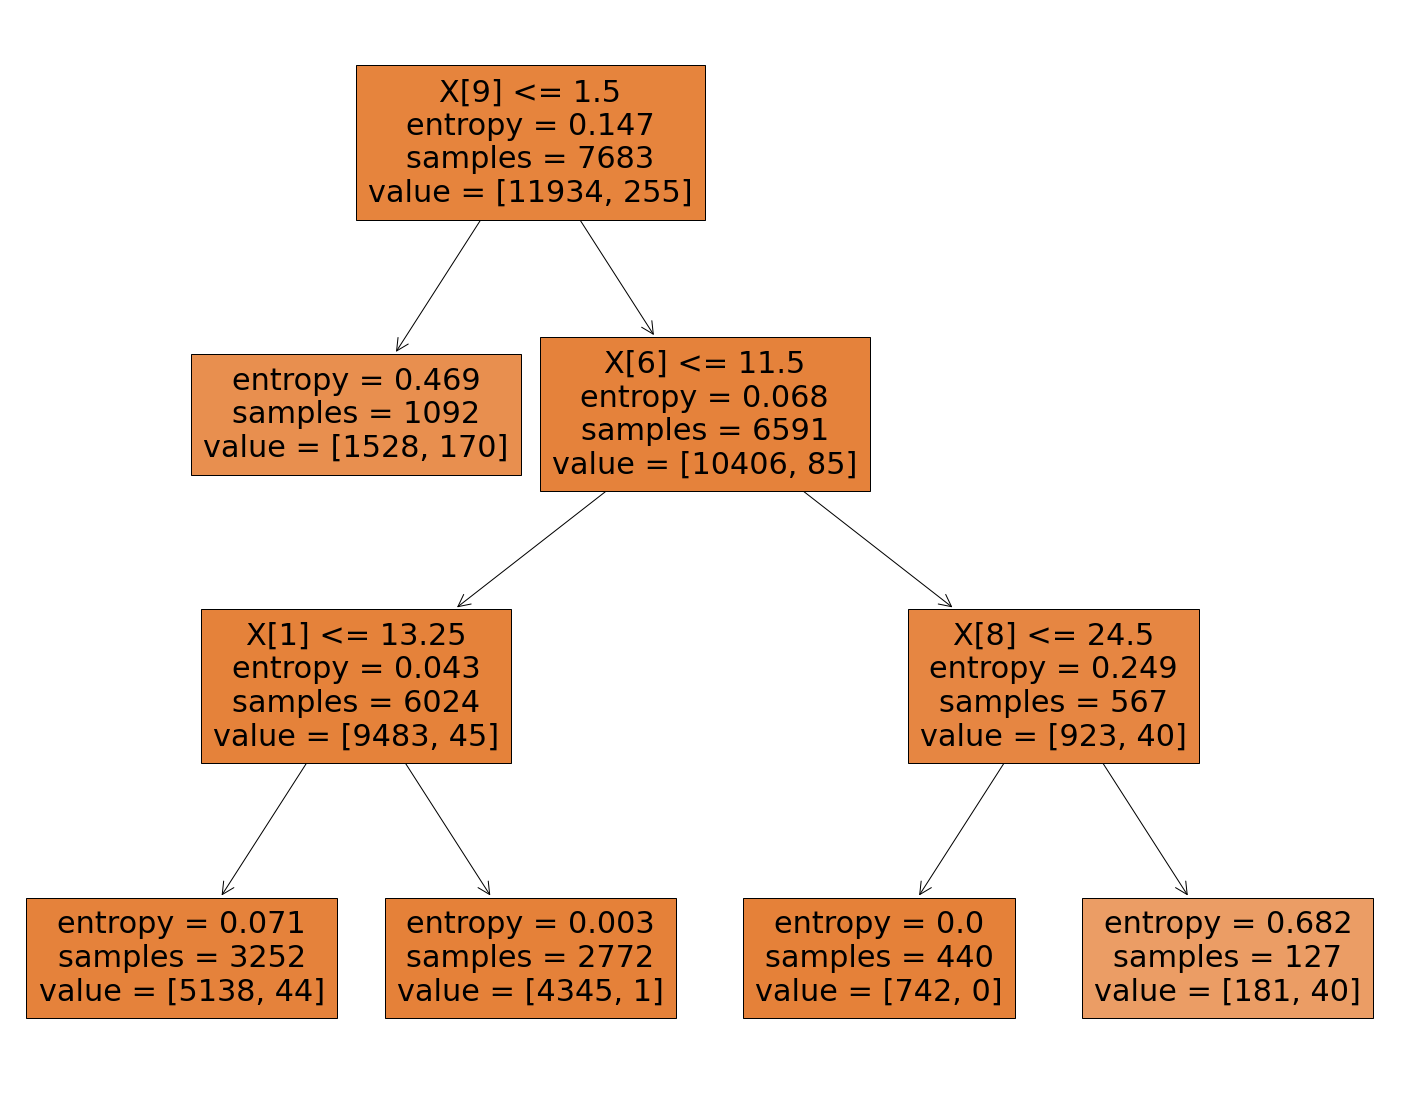

In [66]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(rf_p.estimators_[0],filled=True);

Feature: 0, Score: 0.05112
Feature: 1, Score: 0.05477
Feature: 2, Score: 0.05266
Feature: 3, Score: 0.05740
Feature: 4, Score: 0.06561
Feature: 5, Score: 0.05763
Feature: 6, Score: 0.12438
Feature: 7, Score: 0.06318
Feature: 8, Score: 0.23906
Feature: 9, Score: 0.15465
Feature: 10, Score: 0.03211
Feature: 11, Score: 0.04743


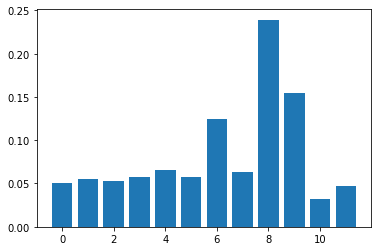

In [67]:
#Feature Importance

importance = rf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    ""
#menampilkan plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [69]:
#split dataset in features and target variable
importance_cols = ['cnt', 't1', 't2','hum','wind_speed']
X2 = london_time[importance_cols] #features
y2 = london_time['is_holiday'] #target variable

#split dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.3, random_state=0) # 70% training, 30% test



In [70]:
#create decision tree classifier obj
rf1 = RandomForestClassifier()

#train decision tree classifier
rf1 = rf1.fit(X2_train, y2_train)

#predict the response for test dataset
y2_pred = rf1.predict(X2_test)

print("Accuracy Random Forest (Feature Importance):",metrics.accuracy_score(y2_test,y2_pred))

Accuracy Random Forest (Feature Importance): 0.9799043062200957


In [43]:
london_time

,year,month,season,day,day_of_week,is_weekend,is_holiday,hour,cnt,t1,t2,weather_code,hum,wind_speed
0,2015,1,3,4,7,1,0,0,182,3.0,2.0,3,93.0,6.0
1,2015,1,3,4,7,1,0,1,138,3.0,2.5,1,93.0,5.0
2,2015,1,3,4,7,1,0,2,134,2.5,2.5,1,96.5,0.0
3,2015,1,3,4,7,1,0,3,72,2.0,2.0,1,100.0,0.0
4,2015,1,3,4,7,1,0,4,47,2.0,0.0,1,93.0,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017,1,3,3,2,0,0,19,1042,5.0,1.0,3,81.0,19.0
17410,2017,1,3,3,2,0,0,20,541,5.0,1.0,4,81.0,21.0
17411,2017,1,3,3,2,0,0,21,337,5.5,1.5,4,78.5,24.0
17412,2017,1,3,3,2,0,0,22,224,5.5,1.5,4,76.0,23.0


In [71]:
#random forest model

#is_weekend
#membagi X dan y
feature_cols = ['cnt','t1', 't2','hum','wind_speed','year','month','season','day','day_of_week','hour','weather_code']
X3 = london_time[feature_cols] #features
y3 = london_time['is_weekend'] #target variable

In [72]:
#split dataset into training and test set

X1_train, X1_test, y1_train, y1_test = train_test_split(X3, y3, test_size=0.3, random_state=0) # 70 % training and 30 % test

In [73]:
#create decision tree classifier object
rf = RandomForestClassifier()

#train decision tree classifier
rf = rf.fit(X1_train,y1_train)

#predict the response for test dataset
y1_pred_rf = rf.predict(X1_test)


Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3758
           1       1.00      1.00      1.00      1467

    accuracy                           1.00      5225
   macro avg       1.00      1.00      1.00      5225
weighted avg       1.00      1.00      1.00      5225



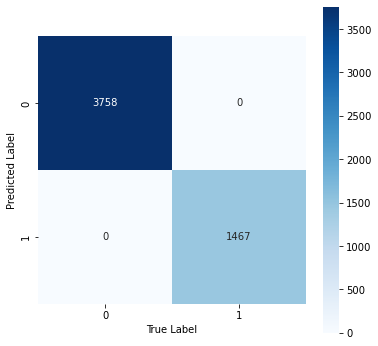

In [74]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y1_pred = rf.predict(X1_test)


mat1 = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(6,6))
sns.heatmap(mat1.T, square= True, annot= True, cmap='Blues', fmt="d")
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# precision, recall f1-score and accuracy
print("Random Forest Classifier\n")
print(classification_report(y1_test, y1_pred))

In [75]:
#Model accuracy
from sklearn import metrics

print("Accuracy Random Forest:",metrics.accuracy_score(y1_test,y1_pred_rf))

Accuracy Random Forest: 1.0


In [76]:
#Cross Validation Random Forest

from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(rf, X1_train, y1_train, cv=10)

#Cross Validation

print('Cross-Validation Accuracy Scores for Random Forest', scores2)
scores2 = pd.Series(scores2)
scores2.min(), scores2.mean(), scores2.max()

Cross-Validation Accuracy Scores for Random Forest [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


(1.0, 1.0, 1.0)

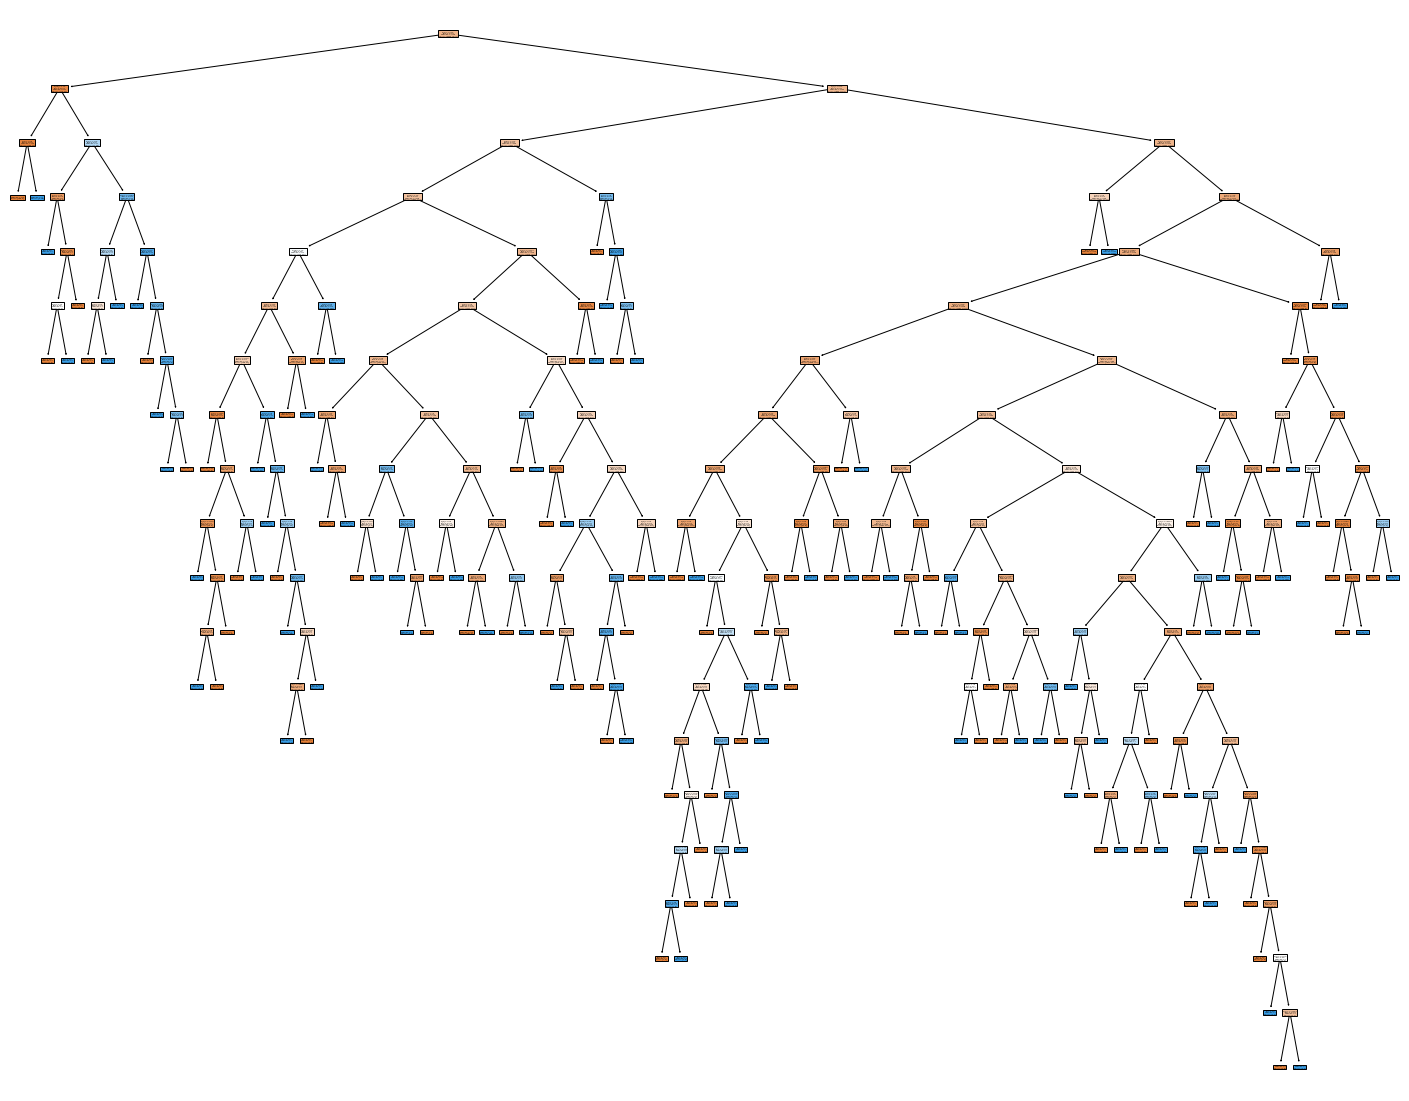

In [77]:
#Without Pruning

from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(rf.estimators_[0],filled=True);

In [78]:
#With Pruning

from sklearn.ensemble import RandomForestClassifier

#create decision tree classifier obj
rf_p = RandomForestClassifier(criterion="entropy", max_depth=3, max_leaf_nodes=5, class_weight=None)

#train decision tree classifier
rf_p = rf_p.fit(X1_train,y1_train)

#predict the response for test dataset
y1_pred_rfp = rf_p.predict(X1_test)

print("Accuracy Random Forest (Pruning)",metrics.accuracy_score(y1_test,y1_pred_rfp))


Accuracy Random Forest (Pruning) 1.0


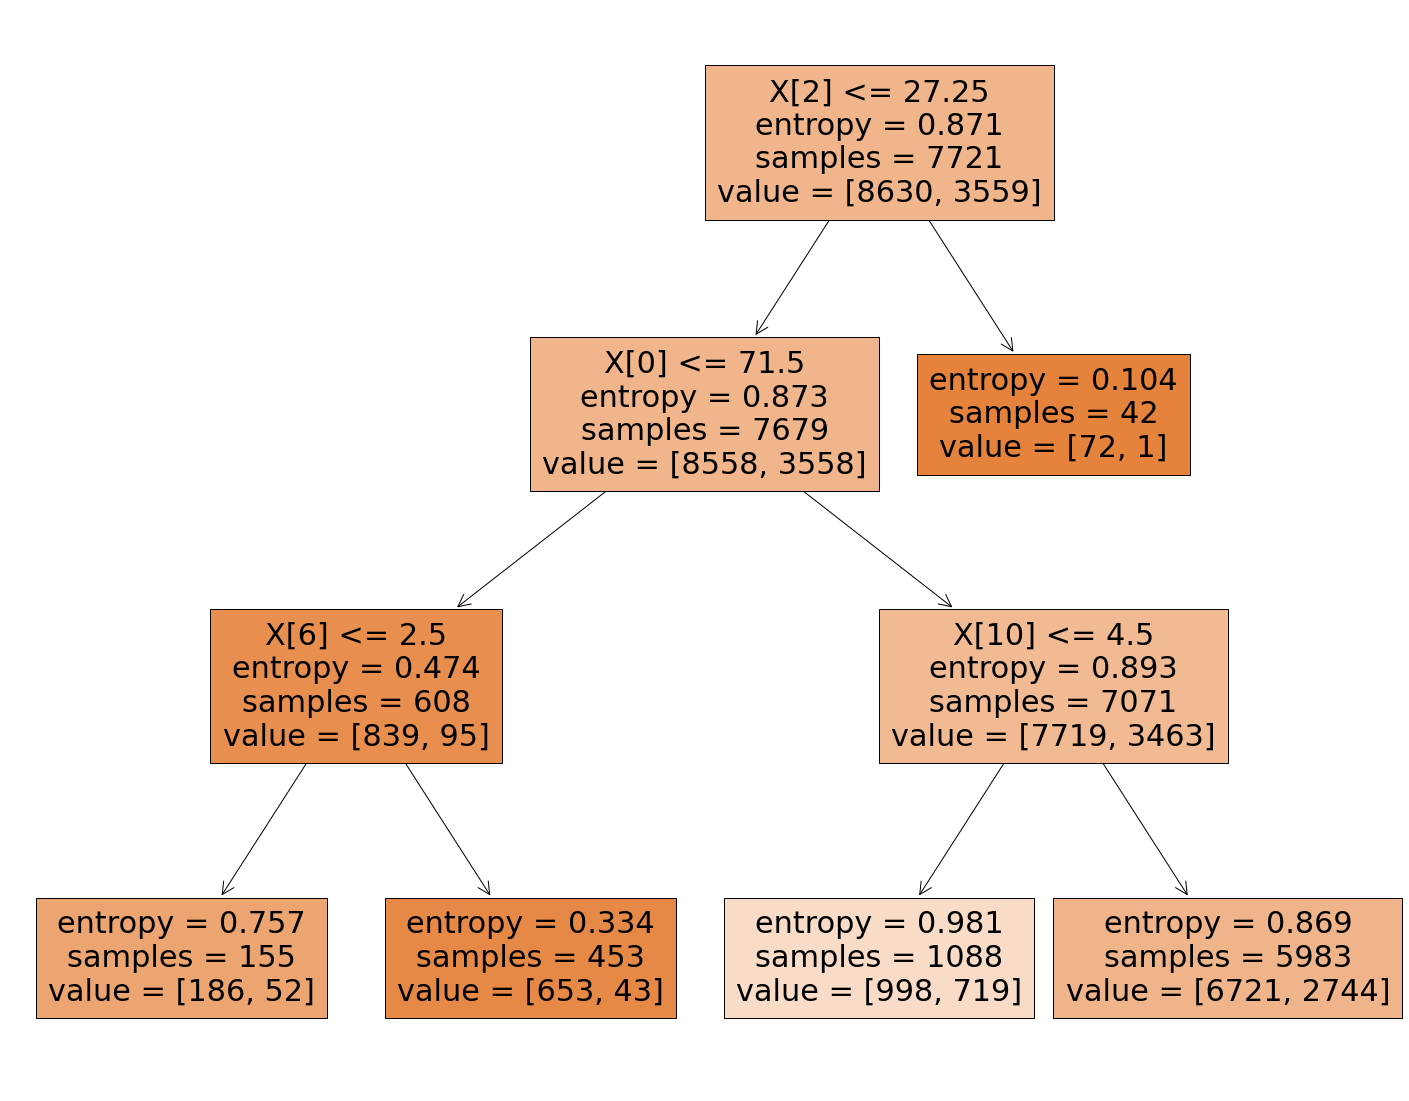

In [79]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(rf_p.estimators_[0],filled=True);

Feature: 0, Score: 0.02640
Feature: 1, Score: 0.00375
Feature: 2, Score: 0.00391
Feature: 3, Score: 0.00339
Feature: 4, Score: 0.00363
Feature: 5, Score: 0.00077
Feature: 6, Score: 0.00316
Feature: 7, Score: 0.00128
Feature: 8, Score: 0.00479
Feature: 9, Score: 0.93307
Feature: 10, Score: 0.01306
Feature: 11, Score: 0.00278


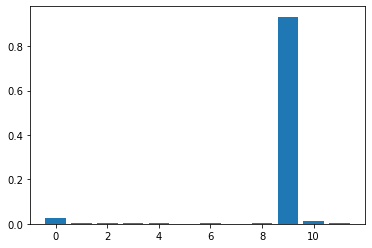

In [80]:
#Feature Importance

importance = rf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    ""
#menampilkan plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [84]:
#split dataset in features and target variable
importance_cols = ['cnt', 't1', 't2','hum','wind_speed']
X4 = london_time[importance_cols] #features
y4 = london_time['is_weekend'] #target variable

#split dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X4,y4, test_size=0.3, random_state=0) # 70% training, 30% test



In [85]:
#create decision tree classifier obj
rf1 = RandomForestClassifier()

#train decision tree classifier
rf1 = rf1.fit(X2_train, y2_train)

#predict the response for test dataset
y2_pred = rf1.predict(X2_test)

print("Accuracy Random Forest (Feature Importance):",metrics.accuracy_score(y2_test,y2_pred))

Accuracy Random Forest (Feature Importance): 0.7450717703349282
